# **How to approach Machine Learning Projects**

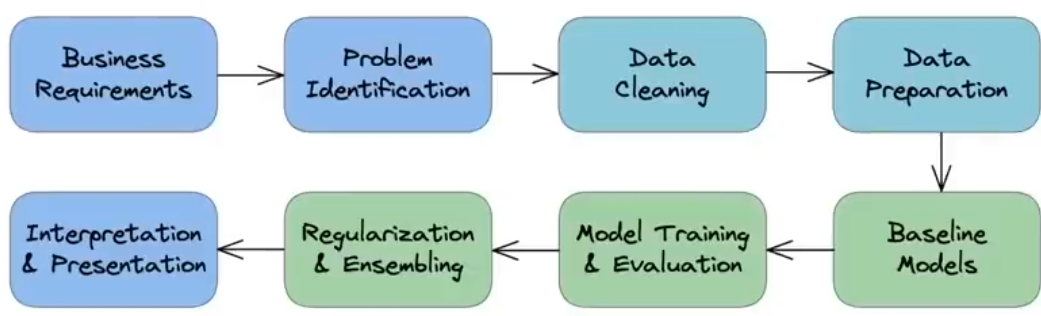

In this tutorial, we'll explore a step-by-step process for approaching ML problems.

1.   Understand the business requirements and the nature of the available data.
2.   Classify the problem as supervised/unsupervised and regression/classification.
1.   Download, clean & explore the data and create new features that may improve models.
2.   Create training/test/validation tests and prepare data for training ML models.
1.   Create a quick and easy baseline model to evaluate and benchmark future models.
2.   Pick a modelling strategy, train a model and tune hyperparameters to achieve optimal fit.
1.   Experiment and combine results from multiple strategies to get a better result.
2.   Interpret models, study individual predictions, and present your findings.

Let's install and import the required libraries.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## **Step 1 - Understand Business Requirements & Nature of Data.**

Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modelling objectives and the nature of data available before you start building a machine learning model.



**Understanding the Big Picture**

The first step is to read the given documentation, talk to various stakeholders and identify the following:


1.   What is the problem you are trying to solve using machine learning?

    *   Increase sales of a particular product.
    *   Reduce churn - the number of people leaving your subscription service.
    *   Forecasting rainfall
2.   Why are we interested in solving this problem? What impact will it have on the business?

    *   To automate manual tasks.
    *   Predict the future
    *   Revenue impact on the business.
    *   Impact to customers/stakeholders.
3.    How is this problem solved currently, without any machine learning tools?
    *   Establish whether there is a better way to just improve the process without machine learning, i.e. you really don't need a machine learning model.
    *   Study the cost of building a machine learning models in terms of time and people involved.
    * The potential impact the ML model will have on the business.
    *  If cost of buiding ML models is higher than the potential saving, then  it is not useful and should use manual method.
4.  Who will use the results of the model, and how does it fit into other business preocesses?
    *   If the other team is going to use the model as yes/no then go for classification model, but if they need an exact number the go for regression model.
    
5.   How much historical data do we have, and how was it collected ?
    *   The scale of the data and the nature of the collection.
    * Was it collected from census(calibration issues)/internet(do we have right to use it)/manually(are there errors).
    * Think about bias and whether it is ethical to use certain kind of data.
6.   What fetaures does the historical data contain? Does it contain the historical values for what we are trying to predict.
    *   If data is unlabelled i.e. target missing, you are to add labels before implementing the ML models.
7.   What are some known issues with the data (data errors, missing data, differences in units)
8.   Can we look at some sample rows form the dataset? How representative the sample is of the entire dataset.
9.   Where is the data stored and how will you get access to it?

Gather as much information about the problem aas possible, so that you've clear understanding of the objective and feasibilty of the project.

### **Working with Real Data**

Whenever possible, try to work with real datasets. Kaggle is a great source for real-world data.

>**EXERCISE**: Go through the dataset for Rossmann Store Sales Prediction & Breast Cancer Identification datset and answer the above questions.

**Rossmann Store Sales Prediction**

*Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.*



1.   **Objective**: Forecast sales using store, promotion, and competitor data.
2.   **Business problem:** We want to predict sales.
1.   **Why are we interested:** We have thousand of stores and everybody tries to make predictions in a different way hence need for standardization to save money. This will bring more accurate predictions and more accurate cost allocation.
2.   **Status quo**: Managers do it individually.
1.   **How can you improve it?**: Train an ML model(**create a formula**) that all managers can put input into and get results out of it.
You can as well do analysis on historical data and come up with something manually
2.   **How much historical data do we have and how was it collected?**: There are historical sales data for 1,115 Rossmann Stores. Because each row represent the data for one day, we have 1m rows and 1115 stores  that means we have 3yrs of data.
2.   **Clean the data** to get the errors.
1.   **Where is data stored**: The data can be stored in Kaggle. It can be from SQL database, multiple sources or JSON format.








## **Step2 - Classify the problem as supervised/unsupervised and regression/classification problem.**
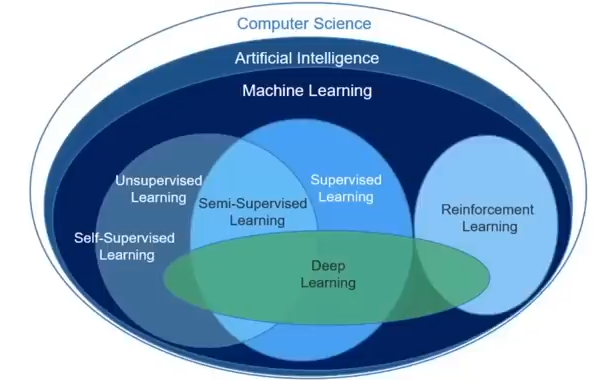

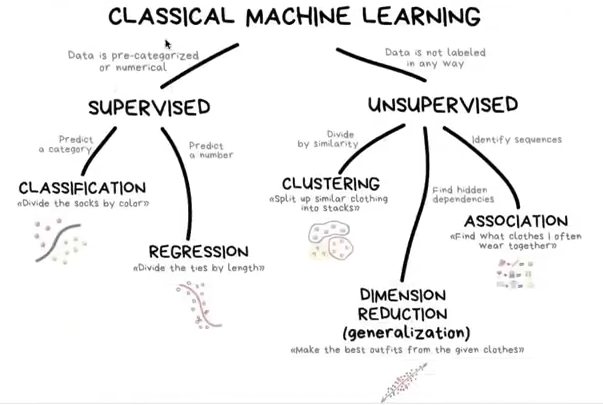

**EXERCISE**: What type of problem is store sales prediction? (kaggle) **Regression**
What type of problem is breast cancer identification?(kaggle) **Classification**
What type of problem is mall customer segmentation - Mall Customer Segmentation dataset (Kaggle)? - **Clustering**

### **Loss Functions and Evaluation Metrics**

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Depending on ther kind of the model you train, your model will use a loss/cost function to optimize durring the training process.


*   **Evaluation metrics** - they're used by humans to evaluate the ML model.
*This is what you discuss with the stakeholders and figure out and arrive on evaluation metric. Promise the business people that you will do a model that meets a certain threshold.*
*   **Loss functions**  - they're used by computers to optimize the ML model.

They are often the same (e.g. RMSE for regression problems), but can be different( e.g. Cross Entropy and Accuracy for classification problems.)[link text](https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7)

**EXERCISE:** What are the appropriate loss function and evaluation metric for store sales prediction.
This is a regression problem and the common loss function typical for this is **RMSE/R-Squared(R^2)**.
RMSE is the evaluation metric for this. This is easy to understand as it simply implies that on average your model is off by a certain amount.

Discuss evaluation metric with the business if they are concerned about outliers, if yes use **RMSE** otherwise use **Mean Absolute Error (MAE)**.
  

**EXERCISE:** What are the appropriate loss function and evaluation metric for store sales prediction.  
What are the appropriate loss function and evaluation metric for breast cancer prediction.

The loss function typical in most classification problems is **Cross Entropy** or in tree based models the **Gini score** every  stage.

The evaluation metric is the **accuracy/precicision/recall/F1 score**. Discuss with stakeholders to make this decsion.

## **Step 3 - Download, clean & explore the data and create new features.**

**Downloading the Data**

There may be different sources to get the data:


*   CSV files
*   SQL databases
*   Raw File URLs
*   Kaggle datasets
*   Google Drive
*   Dropbox






Verify the right tool/library to get the data.

We'll use the `opendatasets` library.

In [3]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rumerodgers
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:01<00:00, 6.87MB/s]



Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [4]:
os.listdir('rossmann-store-sales')

['train.csv', 'test.csv', 'store.csv', 'sample_submission.csv']

In [5]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv',low_memory=False)

In [6]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')

In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


We can merge the 2 data frames to get richer set of features for each row of the training set.

In [10]:
# Perform a left join on the 2 datasets
merged_df = ross_df.merge(store_df, how = 'left', on = 'Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


The dataset also contains a test set.

In [11]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')

In [12]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [13]:
merged_test_df = test_df.merge(store_df, how = 'left', on ='Store')

In [14]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


>**EXERCISE**: Download the breast cancer identification dataset from Kaggle.

## **Cleaning Data**
The first step is to check the column data types and identify if there are any null values.

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

If there are null values, either fill the columns or omit them if they are not useful because ML algorithms can't work with null values.

Talk to the business on how important the column is and if they can provide the missing data. Alternatively, study the distribution of the data i.e. if data is normal distn use average, if exponential use median, or put unknown value for a category.

**If you perform one-Hot encoding for categorical features, all null values automatically become zeros.**

It appears there are no null values.

In [16]:
#Generate descriptive statistics, transpose, and round to 2 dp
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


Look at the ranges of data, especially the min and max to find out whether the data is valid or not.

In our case, the data seems valid i.e. there are no negative sales. If you find -ve sales then you should figure out why. May be on that day there was a huge recall of a product you were handling, then you should exclude that as it is not a representative of what happens  day to day.

Check on the max i.e. we are trying to make prediction in the range of 0 to 40k.

Why were there zero sales on certain days, maybe the stores were closed on those days. Should we handle that in our ML model or should we treat it as a special case.

Have a discussion on anything that stands out.

In [17]:
##Check for duplicate data
merged_df.duplicated().sum()

0

If you do find duplicate rows, discuss and figure out whether this rows should be removed or they are valid data that you should keep.

Let's also parse the date column.

In [18]:
#Convert to datetime format
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [19]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [20]:
# Find the start and end date
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [21]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

Use enough data for test so as enable the model to perform better in future unseen data.

Negotiate with business if they can provide enough data for test or  on how to split data based on availability of data.

Or maybe we train the model regularly i.e after every 2 months.

## **Exploratory Data Analysis and Visualization**

Objectives of exploratory data analysis:
*   Study the distributions of individual columns (uniform, normal, exponential) - This will inform:
    *   How to fill missing values
    *   Apply some transformations i.e. if you see an exponential column and its correlation with the target column is an exponential curve then you can take log of that column to give a better result.
*   Detect anomalies or errors in the data (e.g missing/incorrect values). If you see any anomaly while drawing charts, fix them.
*   Study the relationship of target column with other columns(linear, non-linear etc)
*   Gather insights about the problem and the dataset.
*   Come up with ideas for preprocessing and feature engineering.
    *   May be if you combine 2 columns you may get a better result, ex. if you are predicting the price of a rectangular house and you have width and height, then using the area is better than using the width and height because area has a direct linear r/ship with price but width and height are not direct.
    *   Models are limited by how they are defined. A linear model can never learn a quadratic r/ship that width * length has linear r/ship with cost but if you introduce a 3rd column - area then the model will learn the linear r/ship between area and cost.




Let's study the distribution of the target `Sales` column

<Axes: xlabel='Sales', ylabel='Count'>

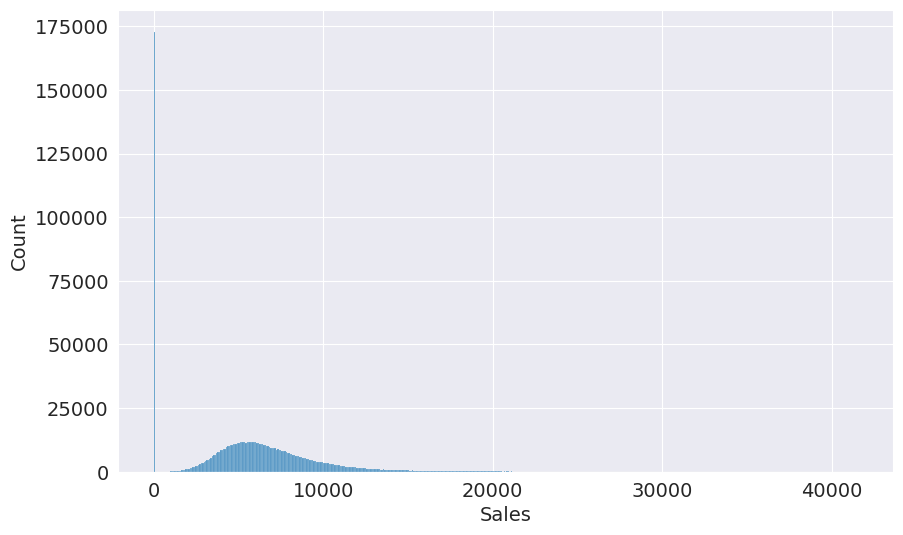

In [22]:
sns.histplot(data = merged_df, x='Sales')

Can you explain why the so many dates?

You can see their is a huge chunk of zeros (175,000 - 1 in 7). This is probably because these are sundays and maybe the store is closed on Sunday.

This can be hard for linear models to predict may be tree based models can figure it out. This is a trivial thing that can be handled upfront.

Let's check if this is because the store was closed.

In [23]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


All the days when the store was closed, the value was zero.

Since we know that we can just look at the value of Open and return zero, then we can exclude from the merged_df all the dates where the store was closed.

To make our modelling simple, let's simply exclude the dates when the store was closed(we can handle it as a special case while making predictions.)

Communicate to the business on this decision i.e. where the store is closed just predict zero.

In [24]:
merged_df = merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

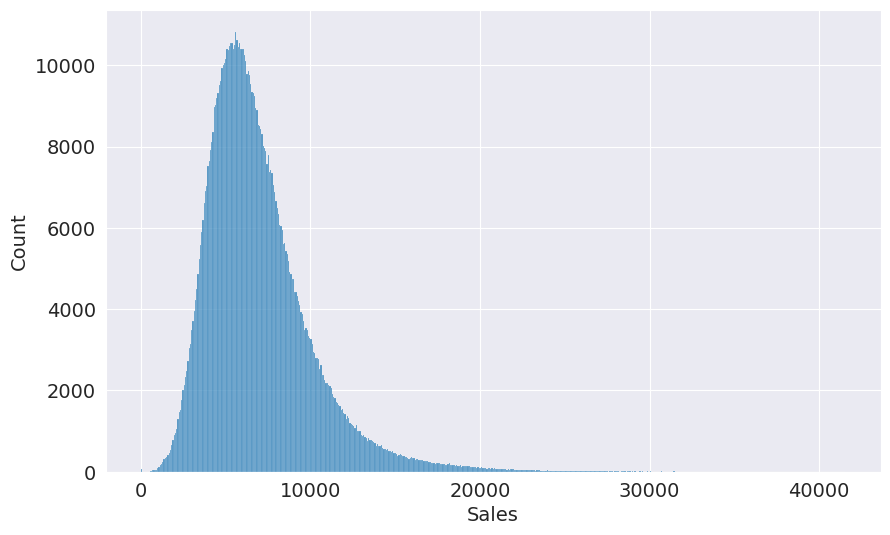

In [25]:
sns.histplot(data= merged_df, x='Sales')

Let's explore other columns

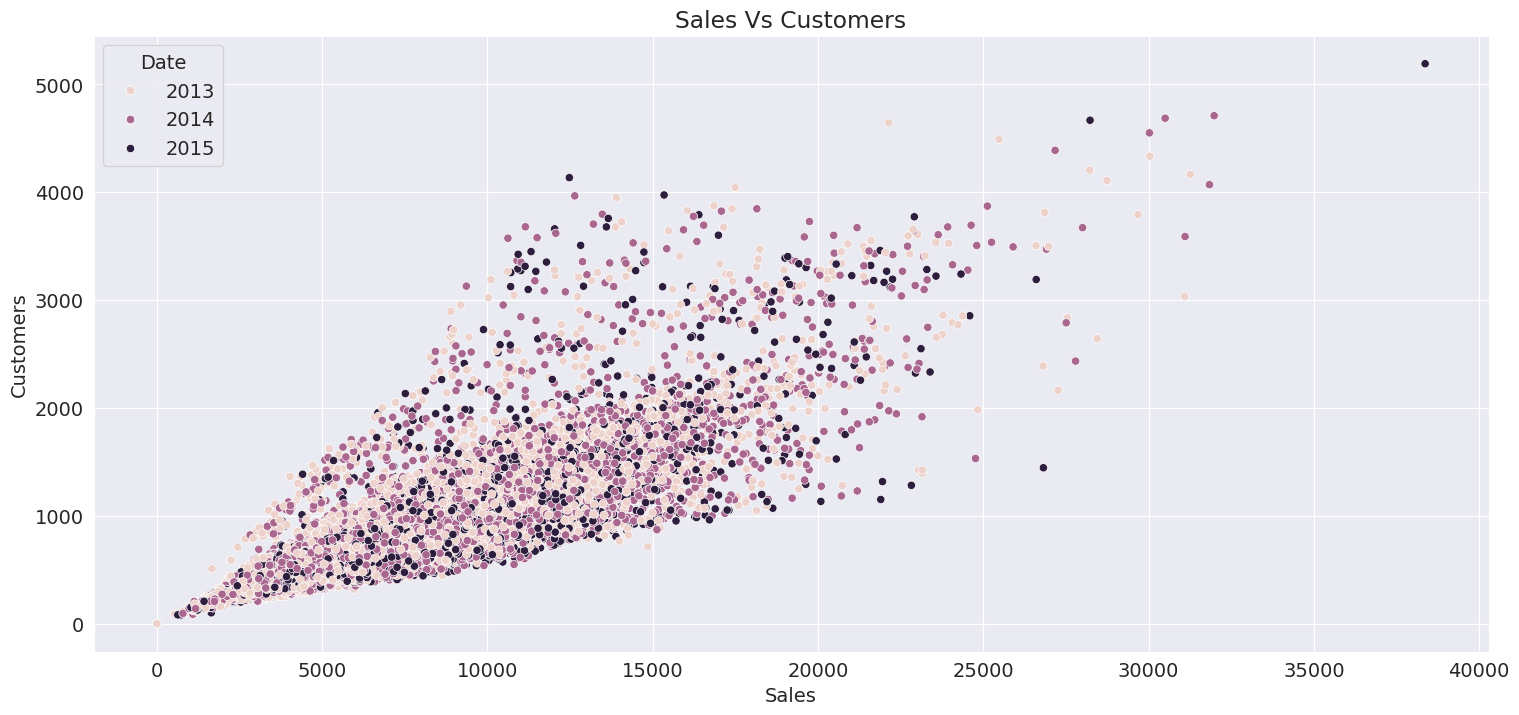

In [26]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha=1)
plt.title("Sales Vs Customers")
plt.show()
##hue color the data points based on year
##alpha makes the datapoints visible

There is a strong correlation where an increase in the number of customers implies an increase in sales. Not necessarrily true because sometimes some customers spend more.

In the scatterplot each point rep one row/day of data of a particular store and are colored by date.

The spending increases overtime with customers. Where the sales are less but the customers are higher, there are alot of 2013s. Where the sales are higher and the customers low there are many 2014s and 2015s.


We cannot use the customers column because we don't know how customers are going to come to the store.

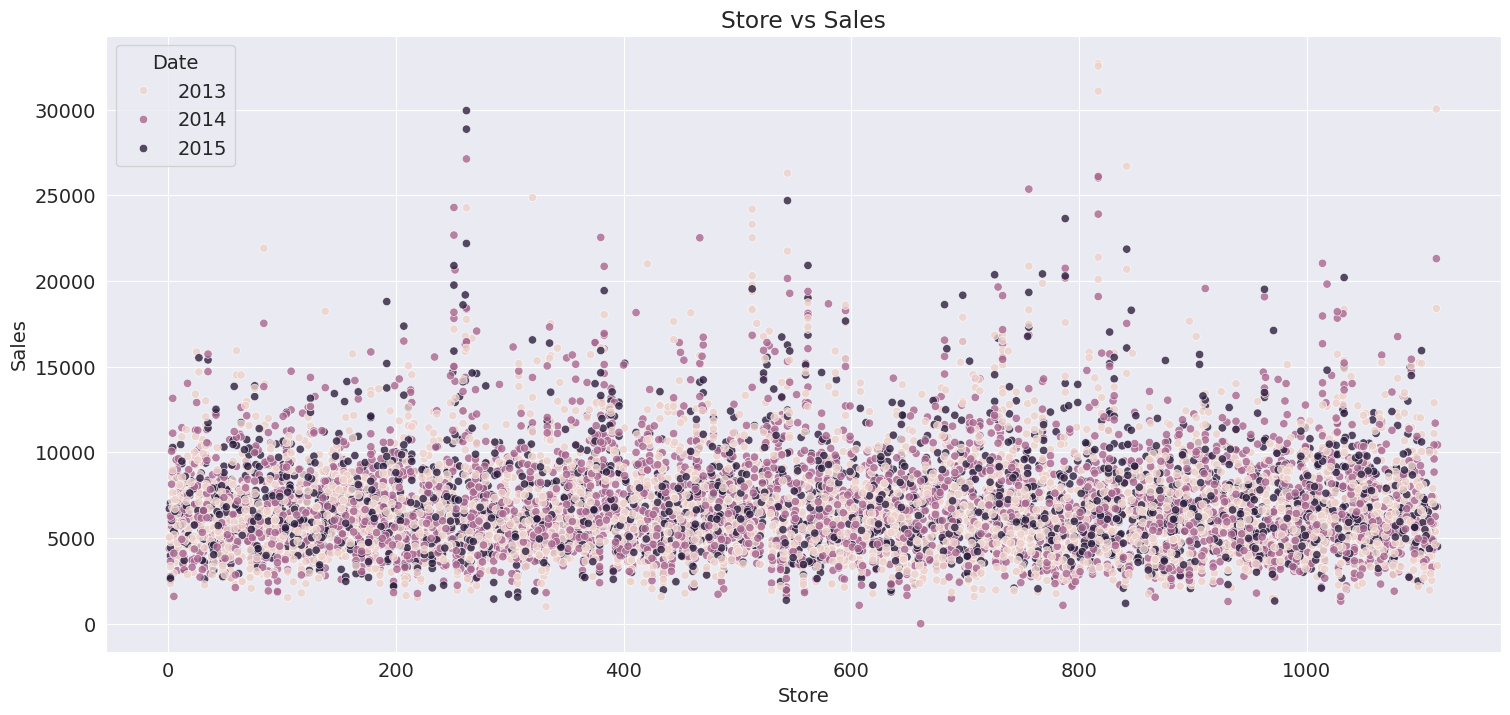

In [27]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Store vs Sales")
plt.show()

We have 1115 stores. The plot is for the sales for each store in a particular day. Each vertical line rep a store. Most stores have sales between 5000 - 15000. Why are some stores sometimes getting high sales and the others mostly standard range?

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

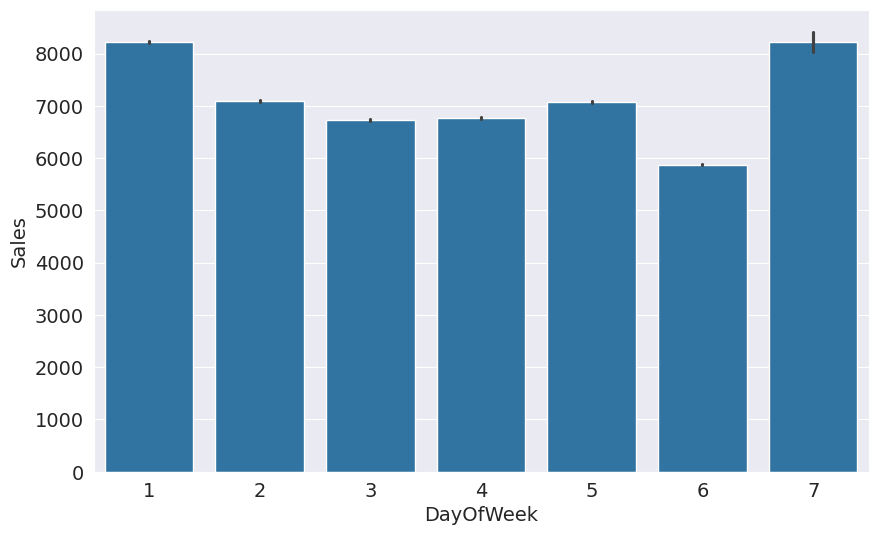

In [28]:
sns.barplot(data = merged_df, x = 'DayOfWeek', y = 'Sales')

The stores are opened 7 days a week with the exception of holidays whenthe stores are closed.

Overall the spending is highest on Sunday and Monday and lowest on saturdays and in between during the week hence an important factor.

<Axes: xlabel='Promo', ylabel='Sales'>

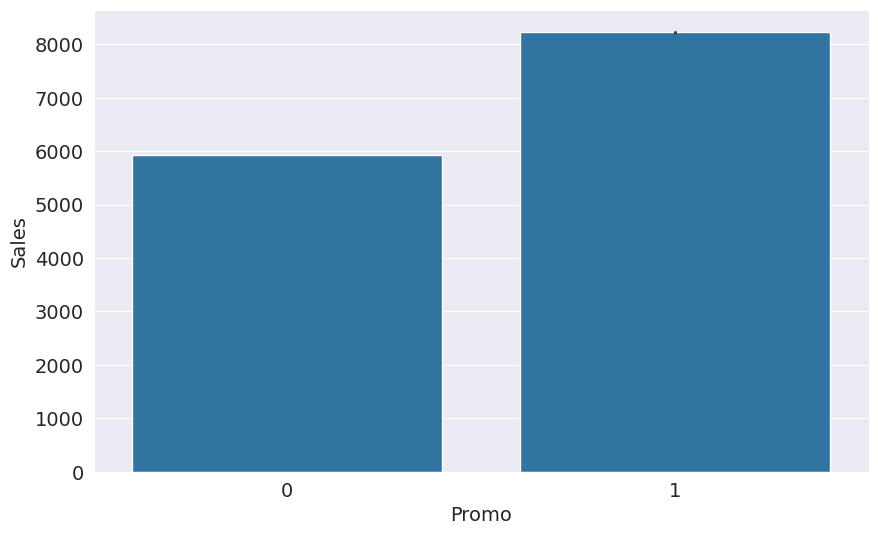

In [29]:
sns.barplot(data = merged_df, x = 'Promo', y = 'Sales')

If you have a promotion he average sales is about 8000 and if you don't the average sales is about 6000 hence an important factor.

In [30]:
merged_df.select_dtypes(np.number).corr()['Sales'].sort_values(ascending = False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


Check at how the target columns is correlated with other columns.

It is highly correlated with the number of customers (this is dropped)

It is correlated with Promo, Promo2SinceWeek, SchoolHoliday.

Store is not useful correlation because it is treated as numerical whereas it is categorical, it should have high impact on the sales.



>**EXERCISE:** Analyse & Visualize other columns of the dataset. How are they related to the target column?

## **Feature Engineering**

Feature engineering is the process of creating new features (columns) by transforming /combining existing features or by incorporating data from external sources.

For example, here are some features that can be extracted from the `Date` column:


1.   Day of the week
2.   Day or month
1.   Month
1.   Year
2.   Weekend/Weekday
2.   Month/Quarter End





In [31]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [32]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

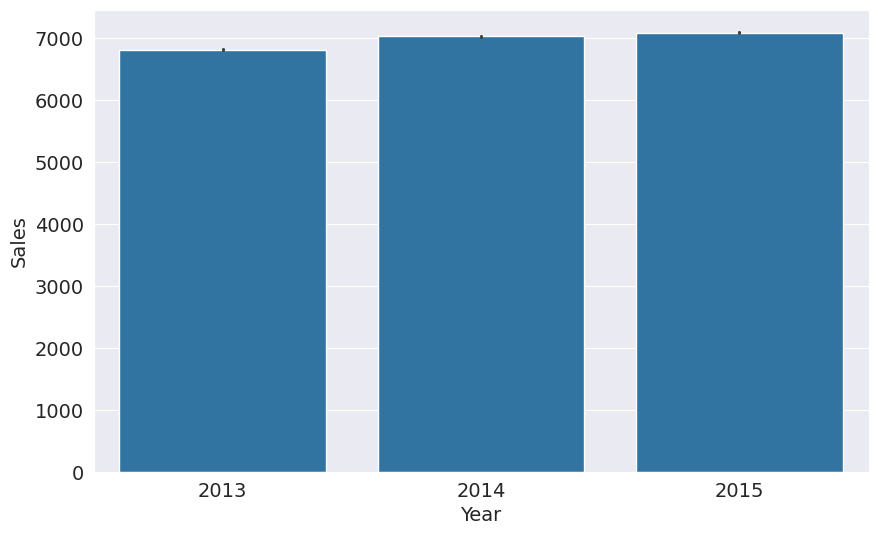

In [33]:
sns.barplot(data = merged_df, x = 'Year', y = 'Sales')

There is a slight increase in sales over the years.

<Axes: xlabel='Month', ylabel='Sales'>

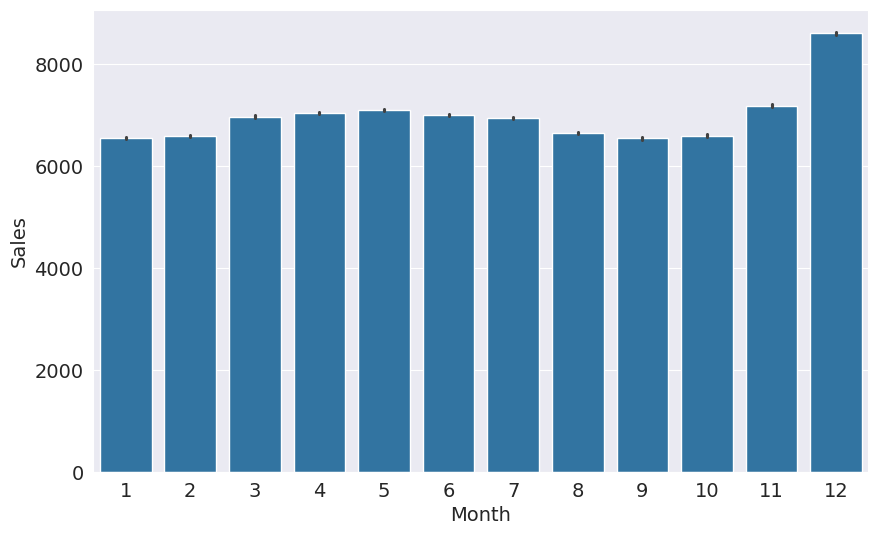

In [34]:
sns.barplot(data = merged_df, x = 'Month', y = 'Sales')

The average daily sales monthwise seems to be hugh in Dec. and a peak in June.

Using date info., we can also create new current columns like:


1.   Weather on each day/temperature on that day/location of each store( getting info. from external sources.)
1.   Whether the date was a public holiday
2.   Whether the store was running a promotion on that day.

>**EXERCISE**: Create new columns using the above ideas.


> **EXERCISE:** The features `Promo2`, `Promo2SinceWeek` are not very useful in their current form, because they do not relate to the current date. How can you improve their representation?

## **Step 4 - Create a training/test/Validation split and prepare data for training**

### **Train/Test/Validation Split**

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll use the last 25% of rows for the validation set, after ordering by date.

In [35]:
len(merged_df)

844392

In [36]:
train_size = int(.75*len(merged_df))
train_size

633294

In [37]:
sorted_df = merged_df.sort_values('Date')##Sort by date
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [38]:
len(train_df), len(val_df)

(633294, 211098)

In [39]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [40]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [41]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

We do a time based split because we understand our model is going to be used in the future. We show the model data it hasn't been trained on.

You can still pick the validation set manually, but in this case the metric you get on the test set may not be similar to the one you get on the real world.

Effort is made to made to make the validation set as close to the real world as possible.

If there are no dates, just pick a random range.

In [42]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### **Input and Target columns**

Let's identify input and target columns. Note that we can't use the number of customers as an input, because this information isn't available beforehand. Also, we needn't use all available columns, we can start out with just a small subset.

In [43]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday',
              'StoreType','Assortment','Day','Month','Year']

In [44]:
target_col='Sales'

Let's also separate out numeric and categorical columns.

In [45]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


Store is a categorical column, i.e. no natural order. The difficulty is treating it as a categorical column and then creating 1115 columns of data. This will immensly increase the size of the data and make it difficult to train the data due to the curse of dimensionality.

**Curse of dimensionality**: If you have alot of different which all are very closely related, then that makes it much easier for your model to overfit. Due to the many parameters, the model do not generalize well.

Because of this we treat stores as numeric variables.  Conduct some engineering i.e. reorder the store, compute the average sale per store/give new numbering to the store (i.e. a higher store number mean a higher average sale and a lower store number mean a lower average sale.)

Linear models genally struggle with this while decision tree models might find it easier.

Day of the week/Month are to be considered categorical but can as well be treated as numerical in this case.

**Linear models stuggle when categorical data is treated as numerical data but decision trees can sought it out.**

In [46]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [47]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [48]:
test_inputs  = merged_test_df[input_cols].copy()
#Test data does not have targets

Note that some columns can be treated as both numeric and categorical, and it's up to you to decide how to deal with them.

In [49]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

## **Imputation, Scaling and Encode**

Let's impute missing data from numeric columns and scale the values to the (0,1) range.

Look at the distribution of each column and figure out, those with `normal` distribution, use `mean` and `exponential` use `median`.


In [50]:
from sklearn.impute import SimpleImputer

In [51]:
imputer = SimpleImputer(strategy = 'mean').fit(train_inputs[numeric_cols])

In [52]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

We can apply a different imputation strategy to different columns on their distributions( e.g. mean for normally distribute and median exponentially distributed).

Let's also scale the values to the (0,1) range.

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [55]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Finally, let's encode categorical columns as one-hot vectors.

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [57]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Let's now extract out the numeric data

In [58]:
x_train = train_inputs[numeric_cols+encoded_cols]
x_val = val_inputs[numeric_cols+encoded_cols]
x_test = test_inputs[numeric_cols+encoded_cols]

The benefit of One-Hot Encoding is that if sales are very high on Sunday(DayOfWeek_7), then a certain decision can be made on just the column (DayOfWeek_7) without referencing any of the days.

## **Step 5 - Create quick & easy baseline models to benchmark future models.**

Create quick and easy baseline models to benchmark your machine learning models.

Imagine you were not using ML, come up with some basic approximation/estimate. Implement these strategies and see what the results look like.

A quick baseline model helps establish the minimum score any ML model yo train should achieve.

In [59]:
train_targets.mean()

6873.17964168301

**Let's assume the model always predict that for the sale for any store for any day is 6873.18.**

In [60]:
def return_mean(inputs):#The function returns the mean over and over for every input.
  return np.full(len(inputs), merged_df.Sales.mean())

In [61]:
train_preds  =return_mean(x_train)

In [62]:
train_targets.head()

,Sales
1017190,5961
1016179,4220
1016353,6851
1016356,17267
1016368,3102


In [63]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Let's evaluate this to using the `RMSE` score

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mean_squared_error(train_preds, train_targets, squared = False)

3082.450443277419

In [66]:
mean_squared_error(return_mean(x_val), val_targets, squared = False)

3168.6033635047716

The model is off by about `$3000` on average. Comparing this to the actual values which in a range of  `3000 to 17000`, which is `14000`.

The RMSE of `3000`, then, if you predict the average all the time you are off by about  `3000/14000` = `20%`.

If your sales predictions is more than `20%`, that means the work is counterproductive. In that case an average value will have a better focus.

Any Machine Learning model we train, should have a lower loss than just predicting the average.

Let's try another model, which makes random guess between the lowest and highest sale.

In [67]:
#Generate an array of random numbers between 0 and 1 from uniform distbn.
#* (hi - lo) calcualtes the range and scale random values from 0 to hi-lo
#SHifts the scaled values so that they are within the range (l0, hi)
def guess_random(inputs):
  #lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
  lo, hi = 3000, 18000
  return np.random.random(len(inputs))*(hi-lo)+lo

In [68]:
train_preds = guess_random(x_train)
train_preds

array([ 7833.67388027,  3708.86973194, 16383.10655826, ...,
        5450.61788592, 16910.28660108,  8871.9576144 ])

In [69]:
##squared = False - computes the RMSE
##Squared = True (default) -  computes the MSE
mean_squared_error(train_preds,train_targets, squared = False)

6430.06051822364

In [70]:
mean_squared_error(guess_random(x_val),val_targets, squared = False)

6293.211965499513

Random guess is off by about `6000`(play by the ranges to get reduce it a bit) and a fixed guess is off by `3000`, **then our model should be off by less than both of these values.**

Clearly, model is much worse.

### **Hand-coded Strategies**

>**EXERCISE:**: Write a function that implements the following strategy:
1.   If the store is closed, return 0.
2.   If the store is opened, return the average sales of the store for the current month in the previous year.(You can have a rule to account for inflation/increasing prices/traffic.

Find the validation set score for this strategy.

Machine Learning solutions do not necessarily perform better, sometimes human insights can give better strategy.




After trying all this, then try a baseline Machine Learning model.

Pick  the simplest model, for regression, `LinearRegression` is the simplest model while for classification problems `LogisticRegression` is the simplest model.

When the models prove to be good enough, you don't have to continue, just end the process there.

### **Baseline ML Model**
Let's train a simple `LinearRegression` model, with no customization.

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linreg = LinearRegression()

In [73]:
linreg.fit(x_train, train_targets)#The model assumes linear relationship btwn inputs & targets

LinearRegression()

`model.fit` uses the following methods for training the model:

1.   We initialize a model with random parameters (weights and biases).
2.   We pass some inputs in to the model to obtain predictions.
1.   We compare the model's predictions with the actual targets using the loss function.
2.   We use an optimization technique (like least squares, gradient descent etc) to reduce the loss by adjusting the weights and biases of the model.
2.   We repeat steps 1 to 4 till the predictions from the model are good enough.





*The linear regression model puts some inputs through the model, get some predictions, compare the pedictins to the target using a loss function, for Linear Regression, it uses the R^2 loss function a variation of the RMSE loss function. It then applies an optimization method, for Linear Regression it is Ordinary Least Squares to improve the weights of the model.*

In [74]:
linreg.coef_

array([ 1.04781334e+02, -9.97982019e+01,  6.51172904e+02,  1.05495132e+02,
       -8.84995136e+13, -8.84995136e+13, -8.84995136e+13, -8.84995136e+13,
       -8.84995136e+13, -8.84995136e+13, -8.84995136e+13, -1.62329335e+14,
       -1.62329335e+14, -2.05291188e+13, -2.05291188e+13, -2.05291188e+13,
       -2.05291188e+13, -1.54341191e+15, -1.54341191e+15, -1.54341191e+15,
       -1.54341191e+15, -1.86490234e+15, -1.86490234e+15, -1.86490234e+15])

In [75]:
x_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

The coefficients corresponds to the columns.

We have fit the model, it is now used to make predictions. Note that the parameters of the model will not be updated during prediction.

In [76]:
train_preds = linreg.predict(x_train)
train_preds

array([ 7115. , 10581. ,  7036. , ...,  6243. ,  5999. ,  5618.5])

In [77]:
mean_squared_error(train_preds, train_targets, squared = False)

2741.5860353706703

In [78]:
val_preds = linreg.predict(x_val)
val_preds

array([5618.5, 5619. , 5999.5, ..., 8649. , 8404.5, 7844.5])

In [79]:
mean_squared_error(val_preds, val_targets, squared = False)

2817.656190781348

Our Linear Regression is off by about `$2800` and our baseline model off by about `$3000`.

Note that a simple linear regression model,isn't much better than our fixed model which always predict the mean because the r/ship is not linear.

Based on the above baselines, we know that any model we train should have ideally a `RMSE` score lower than `$2800`. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense.

## **Step 6 - Pick a strategy, train a model & tune hyperparameters.**

### **Systematically Exploring Modelling Strategies**
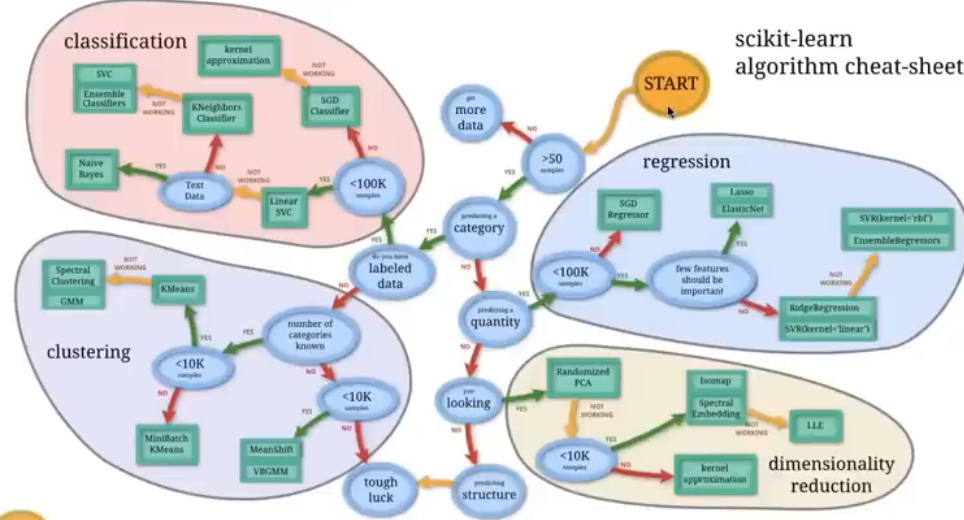

It starts by:
> *  If you have more than 50 samples (minimum for modelling).
Check whether we are predicting a quantity or category.
> * If **category** then check if data is labelled, if yes proceed and use classification algorithm i.e. `RandomForestClassifier`, `DecisionTreeClassifier`, `SVC`, `SGD` and `KNeighbours`.
> * If predicting a **quantity**, then check if we have `<100k` samples use `SGDRegressor` otherwise if some features are more important than others use `Lasso` and `ELasticNet`.

`SGDRRegressor` is `Linear Regression` with the `gradient descent optimization` technique.

If the simplest models fail, then try `ensemble regressors` like `RandomForestregressor`.


Here's the general strategy to follow:


*   Find out which models are applicable to the problem you're solving.
*   Train a basic version for each type of model that's applicable.
*   Identify the modelling approaches that work well and tune their hyperparameters
*   Use a spreadsheet to keep track experiments and results.

Let's define a function `try_model` which takes a model, then performs training and evaluation.

In [80]:
def try_model(model):
  # Fit the model
  model.fit(x_train, train_targets)

  # Generate predictions
  train_preds = model.predict(x_train)
  val_preds = model.predict(x_val)

  # Compute RMSE
  train_rmse = mean_squared_error(train_targets, train_preds, squared = False)
  val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
  return train_rmse, val_rmse

We use this funtionso that we can try different models out because Scikit_Learn has a standardized API to write these functions.

### **Linear Models**

In [81]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [82]:
try_model(LinearRegression())

(2741.5860353706703, 2817.656190781348)

In [83]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [84]:
try_model(Lasso(alpha = 0.6))

(2741.636010459787, 2817.864339612126)

In [85]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [86]:
try_model(SGDRegressor())

(2741.7629107663124, 2820.2469377735465)

All linear models are pretty bad.

>**EXERCISE**: Try changing hyperparameters in the above models and see if you can get a better result.

In [87]:
?ElasticNet

### **Tree Based Models**

In [88]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [89]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)

(0.0, 1559.7378600480247)

The training loss is 0 because decision trees overfit to the training data, we have to experiment with hyperparameters

The validation loss is 1559 which is lower than 2810. The error has been cut to half implying a good model.

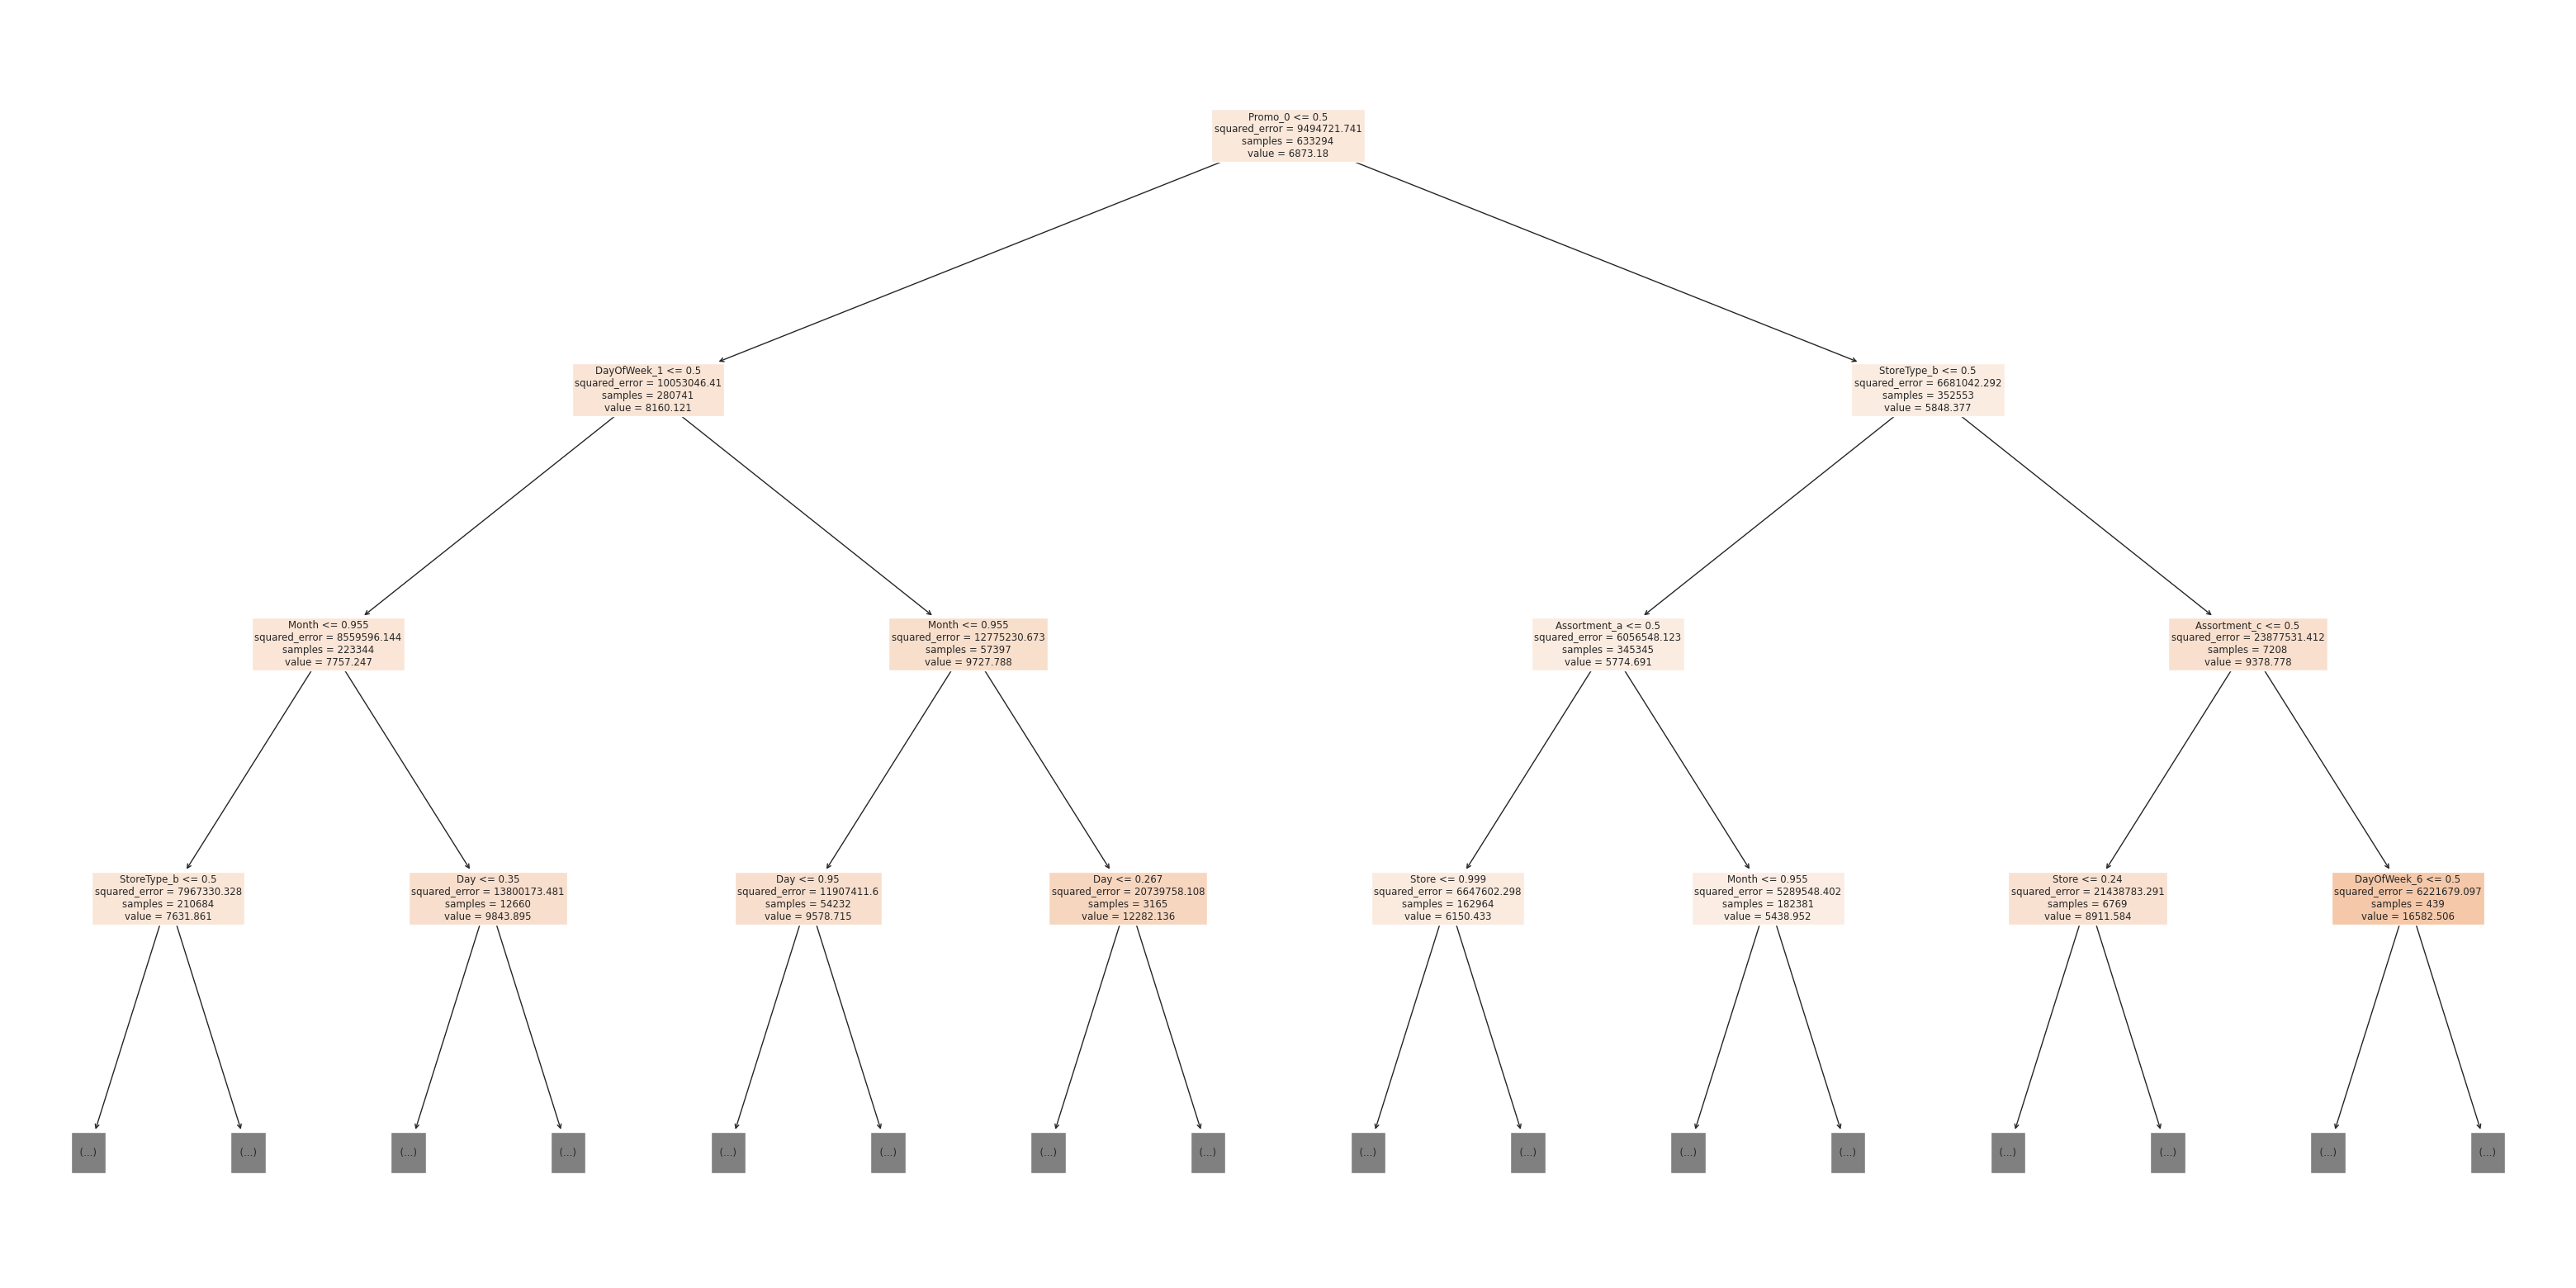

In [90]:
plt.figure(figsize = (40,20))
plot_tree(tree, max_depth = 3, filled = True, feature_names = numeric_cols+encoded_cols);

Let's try a random forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
%%time
rf = RandomForestRegressor(random_state = 42,  n_jobs  =-1, n_estimators  =20)
try_model(rf)

CPU times: user 1min 44s, sys: 1.59 s, total: 1min 45s
Wall time: 1min 22s


(517.6751718026028, 1396.2587846734004)

> **EXERCISE**: Tune the hyperparameters of the decision tree and random forest to get better results.  

### **Other Supervised Learning Models**

>**Exercise**: Try some other supervised learning algorithms and see if you can get a better result.

#### **Unsupervised Learning models**

This are not applicable for this problem.

## **Step 7 - Experiment and combine results from multiple strategies**

In general, the following strategies can be used to improve the performance of a model:


*   Gather more data. A greater amount of data can let you learn more relationships (between outputs and targets) and generalize the model better. This is by getting addit
*   Include more features. The more relevant the features for predicting the target, the better the model gets.
*   Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
*   Look at the specific examples where the model make incorrect or bad predictions and gather some insights.
*   Try strategies like grid search for hyperparameter optimization and K-fold cross validation
*   Combine results from different types of models(ensembling), or train another model using their results.



### **Hyperparameter Optimization & Grid Search**

You can tune hyperparameters manually or use an automated tuning strategy like random search or Grid search.

>**EXERCISE**: Apply grid search to find the best hyperparameters for the random forest regressor trained earlier.

### **K-Fold Cross Validation**
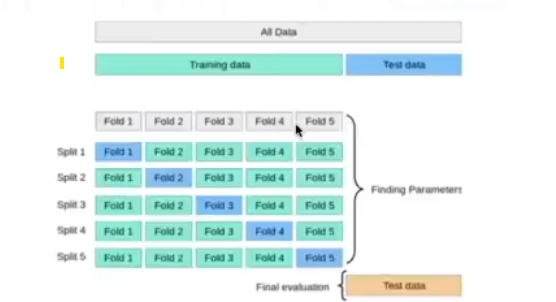

We have some training data and we have some test data. Instead of picking one portion of the training data as the validation data, We can split the training data in to 5 equal portions and then you train 5 diffrent models.
*  For the 1st model, use Fold 1 as the validation set and Fold 2,3, 4,5 as the training set.
* For the 2nd model, use Fold 2 as the validation set and Fold 1,3 4, 5 as the training set and so on.
* You are training 5 different models on 80% of the data and each time it is a different 80%.
* Make predictions using 5 of those models and simply average those predictions out.

The benefit is that instead of setting aside a single validation set, you have used all of the training data while doing validation. You still have a validation score that you use for tuning hyperparameters but you are training on the entire data that is available.
* Cross validation performs poorly in time series data because we want to keep the validation data at the very end of the time period.

>**EXERCISE:**Apply K fold cross validation for the random forest regressor trained earlier.

### **Ensembling and Stacking**
Ensembling refers to combining the results of multiple models.
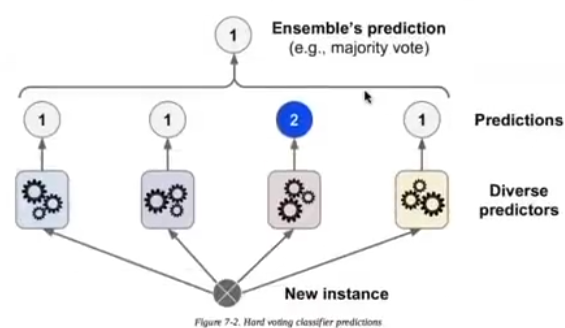

You have the data, you train 5 different models .i.e. Random Forest, Gradient Boosting Machine and then you take prediction from all of these models and if regression pick the average and if classification pick the majority.

Ensembling is an extension of Random Forests. In Random Forest we look at many Decision trees and then average their results. In Ensembling we take 5 different diverse  models like tree based, linear and then average their results.

The benefit is that each model can pick a unique way of relating the inputs to the targets. The results are hence better than the individual models though not always the case.

You can also give weightage to the model, may be you know which model works better, so give higher marks to that model and so on. The result will be the sum of weights * results of the models. Pick the weights in a such a way that the validation loss is minimized.


**EXERCISE**: Ensemble   the result of a random forest and a ridge regressor. Can you get a better score than either of the two models?

**Stacking** implies training another model using the results from multiple models.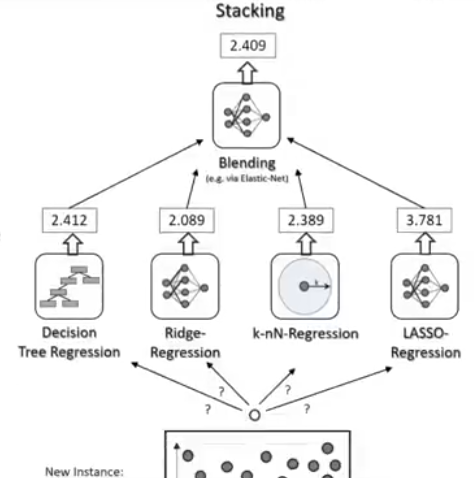

 This involves training a model like linear regression model on top of ensembled results and figure out the optimal weights. The linear regression takes the outputs of each of the model and figures out the best weight to apply to them to minimize the validation loss(stacking - an extension of ensembling)


Ensembling is generally about 3 models while stacking generally involved 1 layer. You will not get to 100% naturally.

## **Step 8 - Interpret models, study individual predictions & present your findings**

### **Feature Importance**

The next thing is to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

In [93]:
rf.feature_importances_

array([6.08577433e-01, 4.90298415e-02, 4.72174228e-02, 9.16706445e-03,
       3.36236378e-02, 4.43197097e-03, 2.39532415e-03, 2.08193346e-03,
       5.70225783e-03, 6.82231256e-03, 4.56073208e-03, 6.93383116e-02,
       6.93642477e-02, 1.16914604e-03, 1.93093531e-04, 2.71813242e-05,
       2.24652904e-05, 1.30160460e-02, 2.26595870e-02, 1.02901583e-02,
       1.38822499e-02, 8.09192402e-03, 5.52821094e-03, 1.28074475e-02])

In [94]:
importance_df = pd.DataFrame({'feature':numeric_cols+encoded_cols,
                              'importance':rf.feature_importances_
}).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.608577
12,Promo_1,0.069364
11,Promo_0,0.069338
1,Day,0.049030
2,Month,0.047217
4,DayOfWeek_1,0.033624
18,StoreType_b,0.022660
20,StoreType_d,0.013882
17,StoreType_a,0.013016
23,Assortment_c,0.012807


<Axes: xlabel='importance', ylabel='feature'>

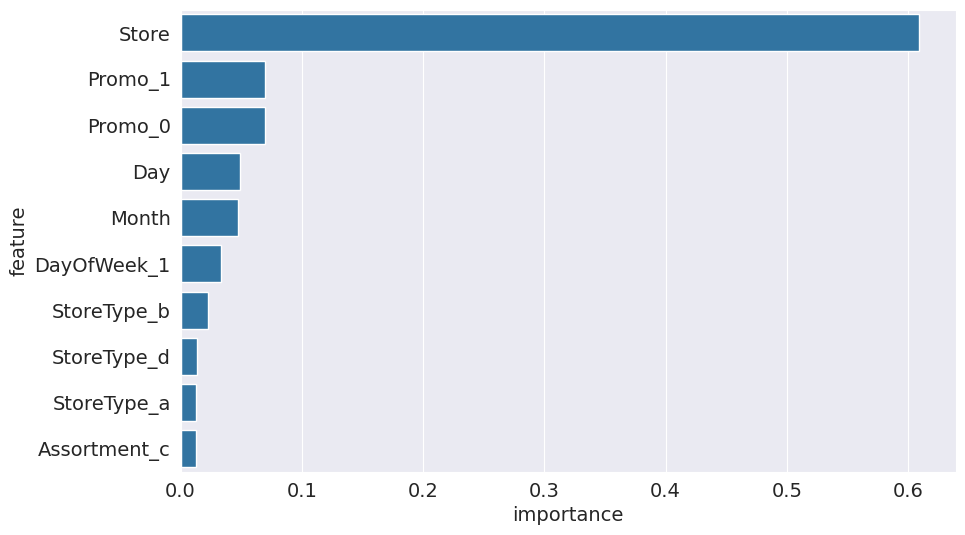

In [95]:
sns.barplot(data  =importance_df.head(10), x='importance', y = 'feature')

The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decsion tree can be used.

In the presentation:
*  The store is the biggest factor in data mining what the sales are going to be like.
*  Promotion is the next most important factor, then the day, Month and week.
* Based on these findings you may want to get other features that best describe the store .i.e. the area of the store, the location of the store, the number of people workng in the store(All this could be indicators on how much business the store does). Add the new features to start making a better prediction.

In machine Learning, you don't train a model and report a metric/loss and say its done. You have to interpret and figure out what more information you need and how can we make it better an iterative process that you have to keep improving over and over.

### **Looking at Individual predictions**

In [96]:
def predict_input(model, single_input):
  if single_input['Open']== 0:
    return 0.
  input_df  =pd.DataFrame([single_input])
  input_df['Date'] = pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols+encoded_cols]
  pred = model.predict(X_input)[0]
  return pred

In [97]:
sample_input  ={'Id':1,
                'Store':1,
                'DayOfWeek':4,
                'Date':'2015-09-17 00:00:00',
                'Open':1.0,
                'Promo':1,
                'StateHoliday':'0',
                'SchoolHoliday':0,
                'StoreType':'c',
                'Assortment':'a',
                'CompetitionDistance':1270.0,
                'CompetitionOpenSinceMonth':9.0,
                'CompetitionOpenSinceYear':2008.0,
                'Promo2':0,
                'Promo2SinceWeek':np.nan,
                'Promo2SinceYear':np.nan,
                'PromoInterval':np.nan}

In [98]:
sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [99]:
predict_input(rf, sample_input)

4107.65

If you notice that a certain parameter as change it is affecting the output more than it should, then it means the model has picked up unintended correlation which it shouldn't have.

You should go back and decide whether you need that column or not. Work with business at this stage.

Look at various examples from the training, validation and test sets to decide if you're happy with the result of your model.

**Presenting your results**

*   Create a presentation for non-technical stakeholders - Communicate frequently with non-technical stakeholders.
*   Understand your audience - figure out what they care about most i.e. metrics, explain to them how it works. First present decision trees and tell them about a more powerful Random Forest.
*   Avoid showing any code or technical jargon, include visualizations(heatmap) and deliver insights in simple words.

Explain why you have chosen the model, why you have engineered the features you have engineered. What the results of your model are?

**Have visualizations i.e. heatmap and feature importance bargraph, correlations**
*   Focus on metrics that are relevant for the busines. Don't use loss functions but focus on the metrics that are relevant to the business
*   Talk about feature importance and how to interpret results
*   Explain the strengths and limitations of the model. Draw out specific examples where the model does poorly and gather clues on how to deal with these special cases i.e. remove them or get new data.
*   Explain how the model can be improved overtime.Whether you need more data, or you should be retraining the model every 2 months. i.e. the model might work well for the month of Sept, October but fail in the month of December.



**Most Machine Learning models fail because of:**


1.   Not having clear communication about the requirements.
2.   Data Scientists not picking a good validation set which is reflective of the kind of data that the model will see in the real world.
3.  Optimising the wrong metric/loss instead of optimising a certain business metric.



### **Making a submission on Kaggle**
If you are participating in a kaggle competition, you can generate a submission to check your score on the test test.

In [112]:
x_test

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.001795,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005386,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.006284,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.007181,0.533333,0.727273,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41084,0.997307,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41085,0.998205,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41086,0.999102,0.000000,0.636364,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [105]:
test_preds = rf.predict(x_test)
test_preds

array([ 4107.65,  7750.75,  8794.25, ...,  6032.95, 20738.55,  6717.4 ])

In [120]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [121]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [132]:
submission_df['Sales'] = test_df['Open'].fillna(1).astype('int')*test_preds

In [133]:
submission_df

,Id,Sales
0,1,4107.65
1,2,7750.75
2,3,8794.25
3,4,6874.60
4,5,6628.50
...,...,...
41083,41084,3185.00
41084,41085,8505.95
41085,41086,6032.95
41086,41087,20738.55


In [135]:
submission_df.to_csv('submission.csv', index = None)### to avoid a third column being added to the excel sheet, use index = none.

>**EXERCISE**: Repeat the steps from thsi notebook with the Breast Cancer Identification dataset:

### **Model Deployment**
At this model point, the model can be handed over to a software developer/ML engineer who can put the model in to production as part of an existing software system. It's important to monitor results of the model and make improvements from time to time.

Check on hw to deploy a model to the Heroku platform using the Flask framework.